In [51]:
%matplotlib inline
import torch
import torch_geometric
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


## build graph from exploration 
### use pretrained exploration model to inference the nodes and edges

In [82]:
# the positions are recorded in the nodes.txt

nodes_list=[]

with open("explore_nodes.txt", "r") as f:
    lines=f.readlines()
    for line in lines:
        items=line.strip("\r ").split(";")
        x, y=items[0].strip("\r ").split(",")
        g_x, g_y=items[1].strip("\r ").split(",")
        nodes_list.append([float(x), float(y), float(g_x), float(g_y)])

print(len(nodes_list))

97


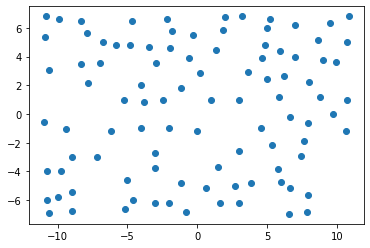

In [83]:


nodes_array=np.array(nodes_list)
plt.scatter(nodes_array[:,2], nodes_array[:,3])
plt.show()

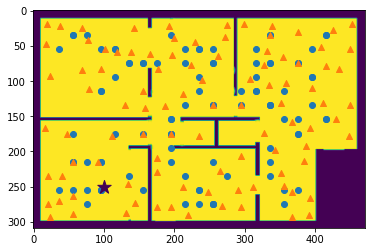

In [95]:
import cv2

image=cv2.imread("floor_plan_simple_plot.png",0)

# show the points in the binary images
def convert_pos_to_imagepos_array(robot_pos_array):
    grid_size=0.05
    cx, cy=235.5,154.5
    image_pos_array=robot_pos_array.copy()
    image_pos_array[:,0]=robot_pos_array[:,0]/grid_size+cx
    image_pos_array[:,1]=-robot_pos_array[:,1]/grid_size+cy
    return image_pos_array

image_pos_array=convert_pos_to_imagepos_array(nodes_array[:,:2])
next_goal_array=convert_pos_to_imagepos_array(nodes_array[:,2:4])

plt.imshow(image)
plt.scatter(image_pos_array[:,0], image_pos_array[:,1], marker="o")
plt.scatter(next_goal_array[:,0], next_goal_array[:,1], marker="^")
plt.scatter(100,250, marker="*", s=200, c=19)
plt.show()

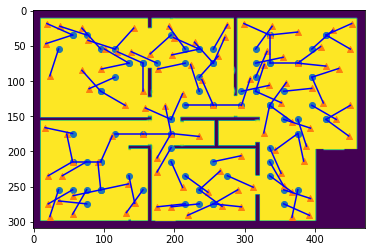

In [85]:
# plt.figure()
plt.imshow(image)
plt.scatter(image_pos_array[:,0], image_pos_array[:,1], marker="o")
plt.scatter(next_goal_array[:,0], next_goal_array[:,1], marker="^")
for i in range(image_pos_array.shape[0]):
    x=[image_pos_array[i,0], next_goal_array[i,0]]
    y=[image_pos_array[i,1], next_goal_array[i,1]]
    plt.plot(x, y, "b", linestyle="-")
plt.show()